In [1]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py

In [2]:
log = xes_importer.apply('example_data/purchasing_order.xes')
net, initial_marking, final_marking = pm4py.read_pnml('example_data/purchasing.pnml')

c:\Users\vinci\OneDrive\Documents\PetriNetBPS\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 608/608 [00:00<00:00, 1642.20it/s]


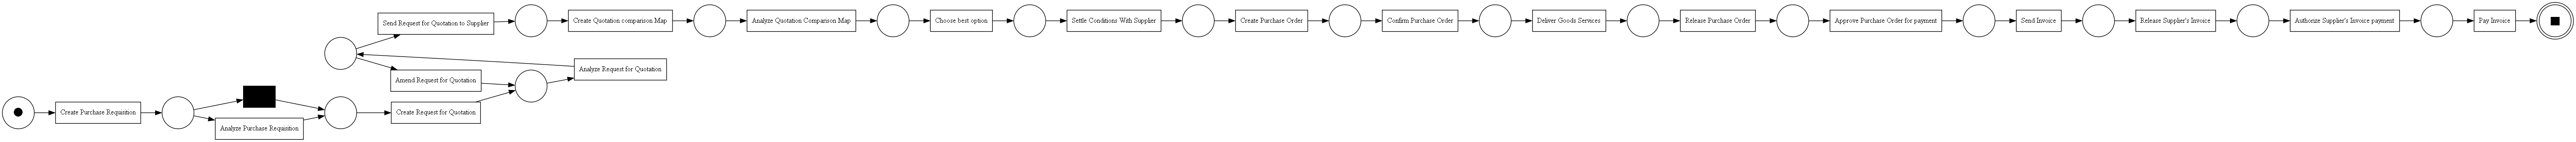

In [3]:
pm4py.view_petri_net(net, initial_marking, final_marking)

In [4]:
from src.PetriNetBPS import SimulatorParameters, SimulatorEngine

parameters = SimulatorParameters(net, initial_marking, final_marking)
parameters.discover_from_eventlog(log, mode_ex_time='resource', mode_trans_weights='data_attributes', history_weights='binary')

100%|██████████| 20/20 [00:00<00:00, 200.01it/s]
c:\Users\vinci\OneDrive\Documents\PetriNetBPS\.conda\Lib\site-packages\scipy\stats\_continuous_distns.py:6480: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\vinci\OneDrive\Documents\PetriNetBPS\.conda\Lib\site-packages\pm4py\utils.py:536: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [5]:
simulator = SimulatorEngine(net, initial_marking, final_marking, parameters)

In [6]:
log_data = simulator.simulate(1000)

  0%|          | 0/1250 [00:00<?, ?it/s]

100%|██████████| 1250/1250 [00:01<00:00, 655.89it/s]


In [7]:
log_data

,case:concept:name,concept:name,start:timestamp,time:timestamp,org:resource
0,0,Create Purchase Requisition,2011-01-01 00:00:00.000000,2011-01-01 00:15:46.582445,Kim Passa
1,0,Analyze Purchase Requisition,2011-01-01 00:15:46.582445,2011-01-01 00:18:05.290935,Maris Freeman
2,0,Create Request for Quotation,2011-01-01 00:18:05.290935,2011-01-01 00:20:00.694292,Heinz Gutschmidt
3,0,Analyze Request for Quotation,2011-01-01 00:20:00.694292,2011-01-01 00:54:02.678487,Francois de Perrier
4,0,Send Request for Quotation to Supplier,2011-01-01 00:54:02.678487,2011-01-01 01:13:43.218885,Karel de Groot
...,...,...,...,...,...
24447,1249,Approve Purchase Order for payment,2011-09-23 10:06:34.264972,2011-09-23 10:06:34.264972,Magdalena Predutta
24448,1249,Send Invoice,2011-09-23 10:06:34.264972,2011-09-23 10:06:34.264972,Kiu Kan
24449,1249,Authorize Supplier's Invoice payment,2011-09-23 10:12:44.052463,2011-09-23 10:12:44.052463,Pedro Alvares
24450,1249,Release Supplier's Invoice,2011-09-23 10:06:34.264972,2011-09-23 10:12:44.052463,Karalda Nimwada


In [8]:
simulator.simulate(1)

100%|██████████| 1/1 [00:00<00:00, 326.51it/s]


,case:concept:name,concept:name,start:timestamp,time:timestamp,org:resource
0,0,Create Purchase Requisition,2011-01-01 00:00:00.000000,2011-01-01 00:49:08.225472,Kim Passa
1,0,Analyze Purchase Requisition,2011-01-01 00:49:08.225472,2011-01-01 00:55:22.442597,Heinz Gutschmidt
2,0,Create Request for Quotation,2011-01-01 00:55:22.442597,2011-01-01 00:57:40.267047,Maris Freeman
3,0,Analyze Request for Quotation,2011-01-01 00:57:40.267047,2011-01-01 01:25:43.476627,Magdalena Predutta
4,0,Amend Request for Quotation,2011-01-01 01:25:43.476627,2011-01-01 01:53:09.115643,Francis Odell
5,0,Analyze Request for Quotation,2011-01-01 01:53:09.115643,2011-01-01 02:25:43.826947,Karel de Groot
6,0,Send Request for Quotation to Supplier,2011-01-01 02:25:43.826947,2011-01-01 02:49:13.173551,Magdalena Predutta
7,0,Create Quotation comparison Map,2011-01-01 02:49:13.173551,2011-01-01 08:14:19.867828,Francois de Perrier
8,0,Choose best option,2011-01-01 08:26:16.019252,2011-01-01 08:26:16.019252,Miu Hanwan
9,0,Analyze Quotation Comparison Map,2011-01-01 08:14:19.867828,2011-01-01 08:26:16.019252,Anna Kaufmann
